# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Logistic Regression`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q3.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Anirudh Kaushik<br>
Roll Number: 2020111015

### Dataset

Use the code below to load the Dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


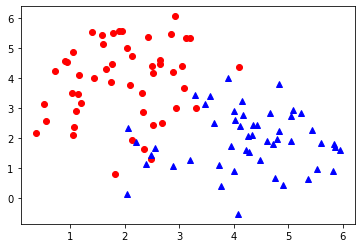

In [55]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')


Write your code below for logistic regression with Gradient Descent and plot the decision boundary.<br>
Sample output is given in the file `LogisticRegression_sample_result.png`

In [56]:
def sigmoid(z):
    sig = 1/(1+np.e**(-z))
    return sig

In [57]:
def derivative_sigmoid(y):
    der = y*(1-y)
    return der

In [58]:
def divergence(y_pred, y):
    # -[ylog(y_pred) + (1-y)log(1-y_pred)]
    # error will be summed over all the divergences for each sample
    div = y*np.log(y_pred) + (1-y)*np.log(1-y_pred)
    div = -div
    return div

In [59]:
def init(X): # get weight and biasmatrix
    weights = np.zeros(X.shape[1] + 1) # dimension of x
    return weights

In [60]:
def linear_layer(x,W): # for a given training sample
   x = np.append(x,1)
   z = np.dot(x,W) # pre-activation 
   return z

In [61]:
def forward_pass(x,W):
    z = linear_layer(x,W) # pre-activation output
    y = sigmoid(z) # activation output
    return y

In [62]:
def backward_pass(x,y,y_pred):
    der_y_J = -(y*(1/y_pred) - (1-y)*(1/(1-y_pred))) # derivative of loss wrt y
    der_z_y = derivative_sigmoid(y_pred) # derivative of y wrt z
    der_z_J = der_y_J * der_z_y # derivative of loss wrt z
    
    der_w_z =  np.array([x[0], x[1], 1.0]) # derivative of z wrt w
    der_w_J = der_z_J * der_w_z# derivative of loss wrt w
    
    return der_w_J


In [63]:
def MSE(y_pred, y):
    return np.sqrt((y_pred-y)**2)

In [64]:
def model(X,y,learning_rate=0.001,epochs=100):
    W = init(X)
    num_samples = X.shape[0]
    for epoch in range(epochs):
        der_w_Err = 0
        for i in range(len(X)): # for all training samples
            y_pred = forward_pass(X[i],W)
            der_w_J = backward_pass(X[i],y[i],y_pred)
            der_w_Err += der_w_J/num_samples
        # update
        W = W - learning_rate*der_w_Err
    # test
    y_pred_lis = []
    for i in range(len(X_test)):
        y_pred = forward_pass(X_test[i],W)
        if y_pred > 0.5:
            y_pred = 1
        else:
            y_pred = 0
        y_pred_lis.append(y_pred)
#         print(f"Error = {MSE(y_pred, y[i])}")
    return W, y_pred_lis


Error on test set: 0.15
Learned weights w1, w2 and bias = [ 0.18568958 -0.17807595 -0.00342116]


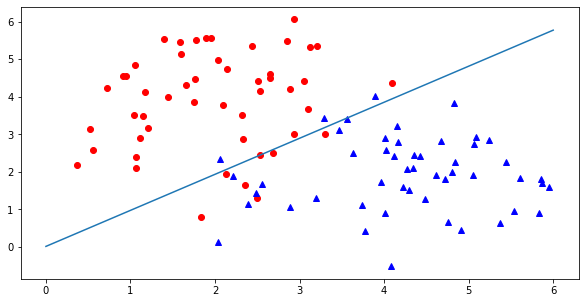

In [69]:
# plot the points
x1 = np.linspace(0,6, 100)
W, y_pred = model(X,y,learning_rate=0.001,epochs=400)

y_pred = np.array(y_pred)
print(f"Error on test set: {np.sum((y_pred - y_test)**2)/len(y_pred)}")
y1 = -(W[1]/W[0])*x1 -(W[2]/W[0])
print(f"Learned weights w1, w2 and bias = {W}")
# Create the plot
#Visualize dataset 
fig = plt.figure(figsize = (10, 5))
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
plt.plot(x1, y1)
 
# Show the plot
plt.show()

### Questions

1) Explain the approach of Logistic Regression.<br>
2) What is the loss function used?<br>
3) Explain if we can use Mean Square Error(MSE) as Loss function.

### Answers
1. Logistic regression is used to predict a binary output. Linear regression is used to solve regression problem whereas logistic regression is used to solve classification problems.
 - it gives probabilisitc values between 0 and 1.
 - We model the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. The probability is obtained by applying the sigmoid function to the linear layer.
  - $\sigma(z) = \frac{1}{1+e^{-z}}$
  - Here, z is the pre-activation output
  - We then estimate the weights W (parameter estimation) using gradient descent where the gradients are calculated using backpropogation (for our implementation)
  - After a fixed number of epochs (or some threshold) the model "converges" and we use the weights obtained on the test set.
  - Outputs greater than 0.5 are labelled as 1 and outputs less than or equal to 0.5 are labelled as class 0.
   
   
2. We use cross entropy loss as the loss function:

   $ Cost \ function = -\frac{1}{N} \sum_{i=1}^{N} y_i*log(y_{pred(i)}) + (1-y_i)*log(1-y_{pred(i)})$
   
 - Here, $y_i$ is the ground truth for the $i^{th}$ sample and $y_{pred(i)}$ is the predicted value for the $i^{th}$ sample
   
   
 3. MSE cannot be used as a loss function as:
     - Since we use gradient descent algorithm here, we require a convex function. MSE is a non-convex (as double derivative of the MSE cost function is not $\geq$ 0 for $\forall$ x) function and hence it is not guaranteed that we will reach the global minima and there is a chance we might get stuck on a local minima.
     - It does not strongly penalize missclassification even for a perfect mismatch 